In [ ]:
#default_exp PracticalDeepLearning.Lesson1.CourseWork

In [ ]:
#hide
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Lesson 1
> Image Classification using Fastaiv2

Notes following the first lesson of the fastai 2019 Deep Learning for Practitioners Course. Code follows the lesson using fastaiv2, fastcore and is documented using the nbdev library.

In [ ]:
#export
from fastai2.data.all import *
from fastai2.vision.all import *
from nbdev.showdoc import *

# Looking at the data

## Getting the dataset
Just like in Lesson 1, we will be using the [Oxford-III3](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) Dataset. In fastaiv2 the syntax is similar, except we can't install everything just by importing fastai. To import untar we need to make sure we are importing `fastai.data.all` or `fastai.data`.

To get a better idea of how untar looks like, we use the show_doc function from nbdev.
> Note: This typically won't work for non-fastai functions.

In [ ]:
#hide
show_doc(untar_data)

<h4 id="untar_data" class="doc_header"><code>untar_data</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/data/external.py#L202" class="source_link" style="float:right">[source]</a></h4>

> <code>untar_data</code>(**`url`**, **`fname`**=*`None`*, **`dest`**=*`None`*, **`c_key`**=*`'data'`*, **`force_download`**=*`False`*, **`extract_func`**=*`'file_extract'`*)

Download `url` to [`fname`](PracticalDeepLearning2019.Lesson1#fname) if `dest` doesn't exist, and un-tgz to folder `dest`.

We also still have the URLs from before, and we can look at the doc for the URLs class and for the object that comes out of URLs.PETS. URLs is just a class object that stores all of fastai's datasets, printing URLs.PETS gives us the last url file as a string just like it says in the docs.

If we wanted to download a different dataset to work with fastai, all we would have to do is pass the dataset download link to untar_data.

In [ ]:
#hide
show_doc(URLs)
show_doc(URLs.PETS)
print(URLs.PETS)

<h2 id="URLs" class="doc_header"><code>class</code> <code>URLs</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/data/external.py#L49" class="source_link" style="float:right">[source]</a></h2>

> <code>URLs</code>()

Global constants for dataset and model URLs.

<h4 id="tgz" class="doc_header"><code>tgz</code><a href="" class="source_link" style="float:right">[source]</a></h4>

str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to sys.getdefaultencoding().
errors defaults to 'strict'.

https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz


Putting this together gives us a small download indicator (unless the dataset was already downloaded). The untar_data function also returns a Path object of where the dataset is located. Because of this, it's better to store the output to a variable like "path".

In [ ]:
#export
path = untar_data(URLs.PETS)

We can see what's inside this dataset using the Path method ls. One thing to notice is that the output is not a normal python list anymore, now it's an L object from the fastcore library. This is because the object is "patched" once to import fastcore.utils. We can see this with show_doc as well since the source leads us to the fastcore library repo.

In [ ]:
#hide
show_doc(path.ls)
path.ls()

<h4 id="Path.ls" class="doc_header"><code>Path.ls</code><a href="https://github.com/fastai/fastcore/tree/master/fastcore/utils.py#L438" class="source_link" style="float:right">[source]</a></h4>

> <code>Path.ls</code>(**`n_max`**=*`None`*, **`file_type`**=*`None`*, **`file_exts`**=*`None`*)

Contents of path as a list

(#2) [Path('/home/holydemon/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
#export
path_anno, path_img = [path/folder for folder in path.ls()]

## Opening the files
To get the image files call the get_image_files function. If you have files that aren't images you can use the get_files function and pass the mime file extensions that you are looking for as a parameter.

In [ ]:
#hide
show_doc(get_files)
show_doc(get_image_files)

<h4 id="get_files" class="doc_header"><code>get_files</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/data/transforms.py#L23" class="source_link" style="float:right">[source]</a></h4>

> <code>get_files</code>(**`path`**, **`extensions`**=*`None`*, **`recurse`**=*`True`*, **`folders`**=*`None`*)

Get all the files in [`path`](PracticalDeepLearning2019.Lesson1#path) with optional `extensions`, optionally with `recurse`, only in `folders`, if specified.

<h4 id="get_image_files" class="doc_header"><code>get_image_files</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/data/transforms.py#L51" class="source_link" style="float:right">[source]</a></h4>

> <code>get_image_files</code>(**`path`**, **`recurse`**=*`True`*, **`folders`**=*`None`*)

Get image files in [`path`](PracticalDeepLearning2019.Lesson1#path) recursively, only in `folders`, if specified.

In [ ]:
#export
fname = get_image_files(path_img)
fname[:5]

(#5) [Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/Sphynx_48.jpg'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/samoyed_126.jpg'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/boxer_20.jpg'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/scottish_terrier_161.jpg'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/shiba_inu_84.jpg')]

Now that we have the data we can simply open the file with the PIL library which was imported in fastai2.core

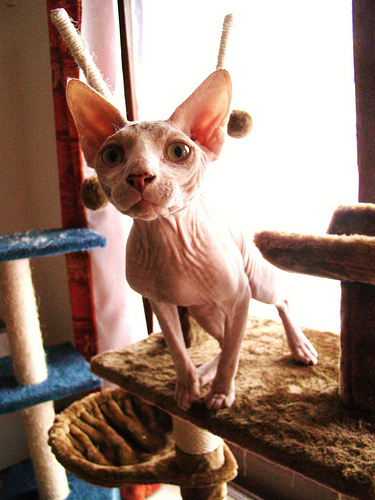

In [ ]:
#export
img = Image.open(fname[0]).convert('RGB')
img

## Viewing the data with labels

With the new fastcore functionality, we can define an object with a show function to be able to see it in various functions like show_batch. For simple image classification this is fairly straight forward, especially because fastai2 has most of the common tools implemented already using fastcore.

Some of the functions we didn't already see are RandomSplitter, Resize, aug_transforms and RegexLabeller.

There are also the ItemBlock classes that need to be used for fastai compatability. In this case we can use ImageBlock and CategoryBlock

In [ ]:
#hide
show_doc(RandomSplitter)
show_doc(Resize)
show_doc(aug_transforms)
show_doc(RegexLabeller)

<h4 id="RandomSplitter" class="doc_header"><code>RandomSplitter</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/data/transforms.py#L67" class="source_link" style="float:right">[source]</a></h4>

> <code>RandomSplitter</code>(**`valid_pct`**=*`0.2`*, **`seed`**=*`None`*, **\*\*`kwargs`**)

Create function that splits `items` between train/val with `valid_pct` randomly.

<h2 id="Resize" class="doc_header"><code>class</code> <code>Resize</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/vision/augment.py#L190" class="source_link" style="float:right">[source]</a></h2>

> <code>Resize</code>(**`size`**, **`method`**=*`'crop'`*, **`pad_mode`**=*`'reflection'`*, **`resamples`**=*`(2, 0)`*, **\*\*`kwargs`**) :: `RandTransform`

A transform that before_call its state at each `__call__`

<h4 id="aug_transforms" class="doc_header"><code>aug_transforms</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/vision/augment.py#L764" class="source_link" style="float:right">[source]</a></h4>

> <code>aug_transforms</code>(**`mult`**=*`1.0`*, **`do_flip`**=*`True`*, **`flip_vert`**=*`False`*, **`max_rotate`**=*`10.0`*, **`max_zoom`**=*`1.1`*, **`max_lighting`**=*`0.2`*, **`max_warp`**=*`0.2`*, **`p_affine`**=*`0.75`*, **`p_lighting`**=*`0.75`*, **`xtra_tfms`**=*`None`*, **`size`**=*`None`*, **`mode`**=*`'bilinear'`*, **`pad_mode`**=*`'reflection'`*, **`batch`**=*`False`*, **`min_scale`**=*`1.0`*)

Utility func to easily create a list of flip, rotate, zoom, warp, lighting transforms.

<h2 id="RegexLabeller" class="doc_header"><code>class</code> <code>RegexLabeller</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/data/transforms.py#L131" class="source_link" style="float:right">[source]</a></h2>

> <code>RegexLabeller</code>(**`pat`**, **`match`**=*`False`*)

Label `item` with regex [`pat`](PracticalDeepLearning2019.Lesson1#pat).

In [ ]:
#export
pat = r'/(\w+)_\d+.jpg'

dblock = DataBlock((ImageBlock,CategoryBlock),
                    splitter=RandomSplitter(),
                    get_items=get_image_files,
                    item_tfms=Resize(224),
                    batch_tfms=aug_transforms(),
                    get_y=RegexLabeller(pat))

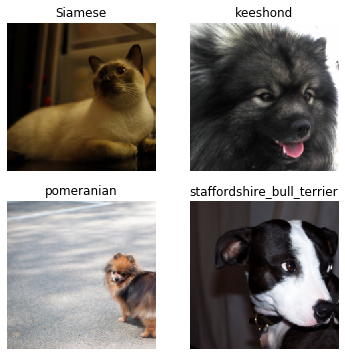

In [ ]:
#export
dls = dblock.dataloaders(path_img, bs=4)

dls.show_batch()